# 📦 SUPPLY CHAIN ANALYSIS

# Import Library

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 Load Data

In [52]:
df = pd.read_csv("project_supply_chain_data.csv")

In [53]:
df.head()

,Product_type,SKU,Price,Availability,Number_of_products_sold,Revenue_generated,Customer_demographics,Stock_levels,Lead_times,Order_quantities,...,Location,Lead_time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Inspection_results,Defect_rates,Transportation_modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


# Initial Data Understanding

In [54]:
df.shape
df.info()
df.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product_type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number_of_products_sold  100 non-null    int64  
 5   Revenue_generated        100 non-null    float64
 6   Customer_demographics    100 non-null    object 
 7   Stock_levels             100 non-null    int64  
 8   Lead_times               100 non-null    int64  
 9   Order_quantities         100 non-null    int64  
 10  Shipping_times           100 non-null    int64  
 11  Shipping_carriers        100 non-null    object 
 12  Shipping_costs           100 non-null    float64
 13  Supplier_name            100 non-null    object 
 14  Location                 10

,Product_type,SKU,Price,Availability,Number_of_products_sold,Revenue_generated,Customer_demographics,Stock_levels,Lead_times,Order_quantities,...,Location,Lead_time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Inspection_results,Defect_rates,Transportation_modes,Routes,Costs
count,100,100,100.000000,100.000000,100.000000,100.000000,100,100.000000,100.000000,100.000000,...,100,100.000000,100.000000,100.00000,100.000000,100,100.000000,100,100,100.000000
unique,3,100,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,...,5,NaN,NaN,NaN,NaN,3,NaN,4,3,NaN
top,skincare,SKU0,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,...,Kolkata,NaN,NaN,NaN,NaN,Pending,NaN,Road,Route A,NaN
freq,40,1,NaN,NaN,NaN,NaN,31,NaN,NaN,NaN,...,25,NaN,NaN,NaN,NaN,41,NaN,29,43,NaN
mean,NaN,NaN,49.462461,48.400000,460.990000,5776.048187,NaN,47.770000,15.960000,49.220000,...,NaN,17.080000,567.840000,14.77000,47.266693,NaN,2.277158,NaN,NaN,529.245782
std,NaN,NaN,31.168193,30.743317,303.780074,2732.841744,NaN,31.369372,8.785801,26.784429,...,NaN,8.846251,263.046861,8.91243,28.982841,NaN,1.461366,NaN,NaN,258.301696
min,NaN,NaN,1.699976,1.000000,8.000000,1061.618523,NaN,0.000000,1.000000,1.000000,...,NaN,1.000000,104.000000,1.00000,1.085069,NaN,0.018608,NaN,NaN,103.916248
25%,NaN,NaN,19.597823,22.750000,184.250000,2812.847151,NaN,16.750000,8.000000,26.000000,...,NaN,10.000000,352.000000,7.00000,22.983299,NaN,1.009650,NaN,NaN,318.778455
50%,NaN,NaN,51.239831,43.500000,392.500000,6006.352023,NaN,47.500000,17.000000,52.000000,...,NaN,18.000000,568.500000,14.00000,45.905622,NaN,2.141863,NaN,NaN,520.430444
75%,NaN,NaN,77.198228,75.000000,704.250000,8253.976921,NaN,73.000000,24.000000,71.250000,...,NaN,25.000000,797.000000,23.00000,68.621026,NaN,3.563995,NaN,NaN,763.078231


# check Data Type

In [55]:
print(df.dtypes)

Product_type                object
SKU                         object
Price                      float64
Availability                 int64
Number_of_products_sold      int64
Revenue_generated          float64
Customer_demographics       object
Stock_levels                 int64
Lead_times                   int64
Order_quantities             int64
Shipping_times               int64
Shipping_carriers           object
Shipping_costs             float64
Supplier_name               object
Location                    object
Lead_time                    int64
Production_volumes           int64
Manufacturing_lead_time      int64
Manufacturing_costs        float64
Inspection_results          object
Defect_rates               float64
Transportation_modes        object
Routes                      object
Costs                      float64
dtype: object


# Drop Unwanted Columns

In [56]:
unwanted_cols = ['SKU','Lead_time','Costs','Inspection_results']
df.drop(columns = unwanted_cols,inplace = True)

# check Remaining Columns

In [57]:
print(df.columns)

Index(['Product_type', 'Price', 'Availability', 'Number_of_products_sold',
       'Revenue_generated', 'Customer_demographics', 'Stock_levels',
       'Lead_times', 'Order_quantities', 'Shipping_times', 'Shipping_carriers',
       'Shipping_costs', 'Supplier_name', 'Location', 'Production_volumes',
       'Manufacturing_lead_time', 'Manufacturing_costs', 'Defect_rates',
       'Transportation_modes', 'Routes'],
      dtype='object')


# Remove duplicate row

In [58]:
df.drop_duplicates(inplace=True)

# Change Column Name

In [59]:
df.rename(columns = {'Number_of_products_sold':'Sales_qty','Revenue_generated':'Revenue'},inplace=True)

# Check Missing Values

In [60]:
print(df.isnull().sum())

Product_type               0
Price                      0
Availability               0
Sales_qty                  0
Revenue                    0
Customer_demographics      0
Stock_levels               0
Lead_times                 0
Order_quantities           0
Shipping_times             0
Shipping_carriers          0
Shipping_costs             0
Supplier_name              0
Location                   0
Production_volumes         0
Manufacturing_lead_time    0
Manufacturing_costs        0
Defect_rates               0
Transportation_modes       0
Routes                     0
dtype: int64


# Standardize Text Column

In [61]:
# Remove extra spaces and standardize text 
df['Product_type']=df['Product_type'].str.strip().str.title()
df['Customer_demographics']=df['Customer_demographics'].str.strip().str.title()
df['Location']=df['Location'].str.strip().str.title()
df['Shipping_carriers']=df['Shipping_carriers'].str.strip().str.title()

In [62]:
df.head()

,Product_type,Price,Availability,Sales_qty,Revenue,Customer_demographics,Stock_levels,Lead_times,Order_quantities,Shipping_times,Shipping_carriers,Shipping_costs,Supplier_name,Location,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Defect_rates,Transportation_modes,Routes
0,Haircare,69.808006,55,802,8661.996792,Non-Binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,215,29,46.279879,0.226410,Road,Route B
1,Skincare,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,517,30,33.616769,4.854068,Road,Route B
2,Haircare,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,971,27,30.688019,4.580593,Air,Route C
3,Skincare,61.163343,68,83,7766.836426,Non-Binary,23,13,59,6,Carrier C,1.729569,Supplier 5,Kolkata,937,18,35.624741,4.746649,Rail,Route A
4,Skincare,4.805496,26,871,2686.505152,Non-Binary,5,3,56,8,Carrier A,3.890548,Supplier 1,Delhi,414,3,92.065161,3.145580,Air,Route A


# Create Columns

In [63]:
# 1.Profit_per_unit
df['Profit_per_unit'] = df['Revenue']/df['Sales_qty']

In [64]:
# 2.Delay_status
df['Delay_status'] = np.where(df['Lead_times']>5,'Delayed','On Time')

In [65]:
# 3.Supplier_risk
df['Supplier_risk'] = np.select([df['Lead_times']>10,df['Lead_times'].between(6,10)],['High','Medium'],default = 'Low')

In [66]:
# 4. Stock_efficiency
df['Stck_efficiency'] = df['Sales_qty']/df['Stock_levels']

In [67]:
df.rename(columns ={'Stck_efficiency':'Stock_efficiency'},inplace = True)

In [68]:
# 5.Revenue_per_product
df['Revenue_per_product'] = df['Revenue']/df['Sales_qty']

In [69]:
df.head()

,Product_type,Price,Availability,Sales_qty,Revenue,Customer_demographics,Stock_levels,Lead_times,Order_quantities,Shipping_times,...,Manufacturing_lead_time,Manufacturing_costs,Defect_rates,Transportation_modes,Routes,Profit_per_unit,Delay_status,Supplier_risk,Stock_efficiency,Revenue_per_product
0,Haircare,69.808006,55,802,8661.996792,Non-Binary,58,7,96,4,...,29,46.279879,0.226410,Road,Route B,10.800495,Delayed,Medium,13.827586,10.800495
1,Skincare,14.843523,95,736,7460.900065,Female,53,30,37,2,...,30,33.616769,4.854068,Road,Route B,10.137092,Delayed,High,13.886792,10.137092
2,Haircare,11.319683,34,8,9577.749626,Unknown,1,10,88,2,...,27,30.688019,4.580593,Air,Route C,1197.218703,Delayed,Medium,8.000000,1197.218703
3,Skincare,61.163343,68,83,7766.836426,Non-Binary,23,13,59,6,...,18,35.624741,4.746649,Rail,Route A,93.576342,Delayed,High,3.608696,93.576342
4,Skincare,4.805496,26,871,2686.505152,Non-Binary,5,3,56,8,...,3,92.065161,3.145580,Air,Route A,3.084392,On Time,Low,174.200000,3.084392


# 🔍 Exploratory Data Analysis

# Describe Numeric Columns

In [70]:
df.describe()

,Price,Availability,Sales_qty,Revenue,Stock_levels,Lead_times,Order_quantities,Shipping_times,Shipping_costs,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Defect_rates,Profit_per_unit,Stock_efficiency,Revenue_per_product
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,567.840000,14.77000,47.266693,2.277158,41.356314,inf,41.356314
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,263.046861,8.91243,28.982841,1.461366,128.153396,NaN,128.153396
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,104.000000,1.00000,1.085069,0.018608,1.366235,0.258065,1.366235
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,352.000000,7.00000,22.983299,1.009650,7.788644,4.574373,7.788644
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,568.500000,14.00000,45.905622,2.141863,12.828546,8.698822,12.828546
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,797.000000,23.00000,68.621026,3.563995,23.435046,20.531907,23.435046
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,985.000000,30.00000,99.466109,4.939255,1197.218703,inf,1197.218703


# Describe Categorical Columns

In [71]:
df.describe(include = 'object')

,Product_type,Customer_demographics,Shipping_carriers,Supplier_name,Location,Transportation_modes,Routes,Delay_status,Supplier_risk
count,100,100,100,100,100,100,100,100,100
unique,3,4,3,5,5,4,3,2,3
top,Skincare,Unknown,Carrier B,Supplier 1,Kolkata,Road,Route A,Delayed,High
freq,40,31,43,27,25,29,43,84,69


# Value Counts

In [72]:
# Frequency check helps to decide dashboard filters / slicers
df['Supplier_name'].value_counts()

Supplier_name
Supplier 1    27
Supplier 2    22
Supplier 5    18
Supplier 4    18
Supplier 3    15
Name: count, dtype: int64

In [73]:
df['Product_type'].value_counts()

Product_type
Skincare     40
Haircare     34
Cosmetics    26
Name: count, dtype: int64

In [74]:
df['Delay_status'].value_counts()

Delay_status
Delayed    84
On Time    16
Name: count, dtype: int64

# Check correlation

In [75]:
df.corr(numeric_only = True)

,Price,Availability,Sales_qty,Revenue,Stock_levels,Lead_times,Order_quantities,Shipping_times,Shipping_costs,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Defect_rates,Profit_per_unit,Stock_efficiency,Revenue_per_product
Price,1.000000,0.019083,0.005739,0.038424,0.078261,0.044855,0.095819,0.071942,0.058543,-0.124575,-0.301313,-0.184123,-0.147247,-0.089781,-0.080634,-0.089781
Availability,0.019083,1.000000,0.087496,-0.075170,-0.025900,0.170439,0.143769,-0.051377,-0.044179,0.050134,0.065333,0.134652,0.040626,-0.040011,0.183730,-0.040011
Sales_qty,0.005739,0.087496,1.000000,-0.001641,0.022189,-0.046419,0.015992,0.087315,0.044285,0.187945,-0.048939,0.034284,-0.082726,-0.344795,0.264839,-0.344795
Revenue,0.038424,-0.075170,-0.001641,1.000000,-0.158480,-0.057296,0.029422,-0.109211,-0.072892,-0.037441,0.014073,-0.214025,-0.125335,0.232143,0.071962,0.232143
Stock_levels,0.078261,-0.025900,0.022189,-0.158480,1.000000,0.072571,-0.111455,-0.094883,0.072907,0.043763,-0.050592,0.033243,-0.149478,-0.190515,-0.425989,-0.190515
Lead_times,0.044855,0.170439,-0.046419,-0.057296,0.072571,1.000000,0.105459,-0.045156,-0.120746,-0.145324,0.003364,-0.024441,0.015681,-0.080992,-0.008102,-0.080992
Order_quantities,0.095819,0.143769,0.015992,0.029422,-0.111455,0.105459,1.000000,-0.002561,0.004261,-0.086567,0.112347,-0.026784,0.018986,0.100060,-0.027347,0.100060
Shipping_times,0.071942,-0.051377,0.087315,-0.109211,-0.094883,-0.045156,-0.002561,1.000000,0.045108,-0.060470,-0.016953,0.029132,-0.036673,-0.185224,0.098149,-0.185224
Shipping_costs,0.058543,-0.044179,0.044285,-0.072892,0.072907,-0.120746,0.004261,0.045108,1.000000,-0.097979,-0.005653,0.005984,0.083139,0.107497,-0.116871,0.107497
Production_volumes,-0.124575,0.050134,0.187945,-0.037441,0.043763,-0.145324,-0.086567,-0.060470,-0.097979,1.000000,0.184457,0.051504,0.118853,0.082872,-0.000621,0.082872


# 📊 Data Visualization

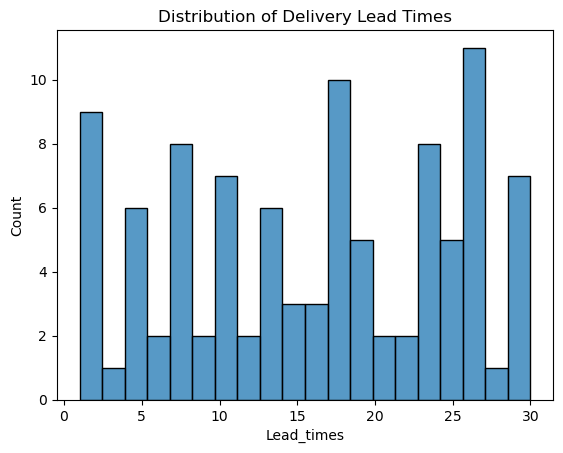

In [76]:
# Histogram helps understand data distribution
plt.title("Distribution of Delivery Lead Times")
sns.histplot(df['Lead_times'],bins = 20)
plt.show()

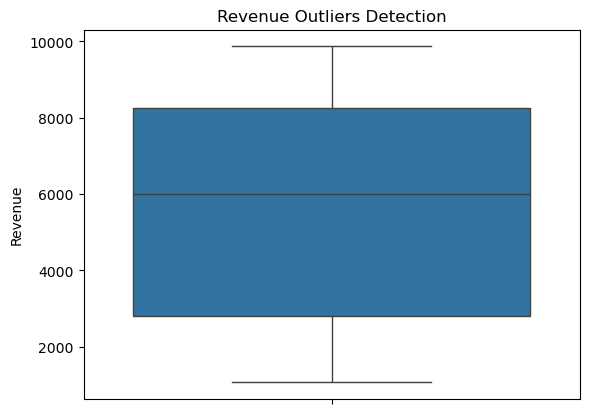

In [77]:
# #Box plot is used to detect outliers
sns.boxplot(y='Revenue', data=df)
plt.title("Revenue Outliers Detection")
plt.show()

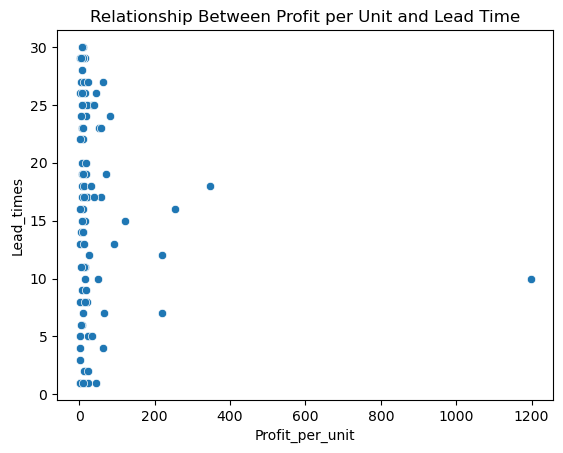

In [37]:
# Scatter plot shows relationship between two numerical variables
sns.scatterplot(x='Profit_per_unit',y = 'Lead_times',data = df)
plt.title("Relationship Between Profit per Unit and Lead Time")
plt.show()

In [5]:
df.to_csv("Cleaned_supply_chain_data.csv",index=False)